# Klasterovanje nad podacima o programerima

Predmet: Istraživanje podataka

Smer: Industrija 4.0, Mašinski i Matematički fakultet, Univerzitet u Beogradu

Student: Andrija Paljevic 4001/2019

Zadatak: Izvrsiti klasterovanje podataka o programerima. Podaci su prikupljeni na osnovu odgovora na pitanja iz ankete. Potrebno je napraviti sto bolje klastere i izvesti zakljucke o njima.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import sklearn.metrics as met
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import random
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Fajl survey_results_public.csv sadrzi odgovore na pitanja koja su davali programeri,
fajl survey_results_schema sadrzi pojasnjenja (znacenja) samih pitanja

In [2]:
df = pd.read_csv('survey_results_public.csv')

C:\Users\Palja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
a = df.isna().sum()
len(a)
print(a)

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64


Zadrzavamo slog ukoliko ima vise od 60% vrednosti

In [5]:
df.dropna(axis=0, how='any', thresh=77, subset=None, inplace=True)

Brisemo kolonu MilitaryUS jer ima 85% nedostajucih vrednosti

Izbacujemo ostale kolone koje koje ne predstavljaju redne atribute, odnosno izmedju njih nije moguce uspostaviti redosled

In [6]:
df.drop(['MilitaryUS'], axis = 1, inplace = True)
df.drop(['Respondent'], axis = 1, inplace = True)
df.drop(['Country'], axis = 1, inplace = True)
df.drop(['Student'], axis = 1, inplace = True)
df.drop(['Employment'], axis = 1, inplace = True)
df.drop(['UndergradMajor'], axis = 1, inplace = True)
df.drop(['DevType'], axis = 1, inplace = True)
df.drop(['HopeFiveYears'], axis = 1, inplace = True)
df.drop(['JobSearchStatus'], axis = 1, inplace = True)
df.drop(['UpdateCV'], axis = 1, inplace = True)
df.drop(['Currency'], axis = 1, inplace = True)
df.drop(['Salary'], axis = 1, inplace = True)
df.drop(['CurrencySymbol'], axis = 1, inplace = True)
df.drop(['CommunicationTools'], axis = 1, inplace = True)
df.drop(['EducationTypes'], axis = 1, inplace = True)
df.drop(['SelfTaughtTypes'], axis = 1, inplace = True)
df.drop(['HackathonReasons'], axis = 1, inplace = True)
df.drop(['LanguageWorkedWith'], axis = 1, inplace = True)
df.drop(['LanguageDesireNextYear'], axis = 1, inplace = True)
df.drop(['DatabaseWorkedWith'], axis = 1, inplace = True)
df.drop(['DatabaseDesireNextYear'], axis = 1, inplace = True)
df.drop(['PlatformWorkedWith'], axis = 1, inplace = True)
df.drop(['PlatformDesireNextYear'], axis = 1, inplace = True)
df.drop(['FrameworkWorkedWith'], axis = 1, inplace = True)
df.drop(['FrameworkDesireNextYear'], axis = 1, inplace = True)
df.drop(['IDE'], axis = 1, inplace = True)
df.drop(['OperatingSystem'], axis = 1, inplace = True)
df.drop(['Methodology'], axis = 1, inplace = True)
df.drop(['VersionControl'], axis = 1, inplace = True)
df.drop(['AdBlocker'], axis = 1, inplace = True)
df.drop(['AdBlockerDisable'], axis = 1, inplace = True)
df.drop(['AdBlockerReasons'], axis = 1, inplace = True)
df.drop(['AdsActions'], axis = 1, inplace = True)
df.drop(['AIDangerous'], axis = 1, inplace = True)
df.drop(['AIInteresting'], axis = 1, inplace = True)
df.drop(['AIResponsible'], axis = 1, inplace = True)
df.drop(['AIFuture'], axis = 1, inplace = True)
df.drop(['EthicsResponsible'], axis = 1, inplace = True)
df.drop(['StackOverflowHasAccount'], axis = 1, inplace = True)
df.drop(['StackOverflowJobs'], axis = 1, inplace = True)
df.drop(['StackOverflowDevStory'], axis = 1, inplace = True)
df.drop(['StackOverflowConsiderMember'], axis = 1, inplace = True)
df.drop(['ErgonomicDevices'], axis = 1, inplace = True)
df.drop(['Gender'], axis = 1, inplace = True)
df.drop(['SexualOrientation'], axis = 1, inplace = True)
df.drop(['RaceEthnicity'], axis = 1, inplace = True)
df.drop(['Hobby'], axis = 1, inplace = True)
df.drop(['OpenSource'], axis = 1, inplace = True)
df.drop(['Dependents'], axis = 1, inplace = True)

Pravimo kopiju originalnog data frame-a da bismo mogli kasnije da je koristimo

In [7]:
# df.iloc[:,9].fillna(df.iloc[:,9].value_counts().index[0], inplace=True)
df_og = df.copy()

Potrebno je pretvoriti tekstualne atribute u numericke jer vecina algoritama klasterovanja radi samo sa numerickim atributima, i ne rade sa nedostajucim vrednostima, pa je i sa njima potrebno adekvatno postupiti

Pravimo funkciju replaceDataFrameColumnValue za pretvaranje rednih vrednosti predstavljene recima u brojevne redne vrednosti

Pravimo funkciju replaceDataFrameMissingValues za popunjavanje nedostajucih vrednosti najcescim

In [8]:
def replaceDataFrameColumnValue(df, col, oldValues, newValues):
    if len(oldValues) == len(newValues):
        for i in range (0, len(oldValues)):
            df[col].replace({oldValues[i]:newValues[i]}, inplace=True)

def replaceDataFrameMissingValues(df):
    for i in range (0, len(df.iloc[0])):
        df.iloc[:,i].fillna(df.iloc[:,i].value_counts().index[0], inplace=True)
    

Primenjujemo ove dve funkcije

In [9]:
# replaceDataFrameColumnValue(df, 'Country', df['Country'].unique(), 
#                             [str(x) for x in range(0, len(df['Country'].unique()))])
# replaceDataFrameColumnValue(df, 'Hobby', ['No', 'Yes'], ['0', '1'])
# replaceDataFrameColumnValue(df, 'OpenSource', ['No', 'Yes'], ['0', '1'])
replaceDataFrameColumnValue(df, 'FormalEducation', ['I never completed any formal education'
                                                    , 'Primary/elementary school'
                                                    , 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
                                                    , 'Some college/university study without earning a degree'
                                                    , 'Associate degree', 'Professional degree (JD, MD, etc.)'
                                                    , 'Bachelor’s degree (BA, BS, B.Eng., etc.)'
                                                    , 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'
                                                    , 'Other doctoral degree (Ph.D, Ed.D., etc.)']
                            , ['0', '1', '2', '3', '4', '5', '6', '7', '8'])
replaceDataFrameColumnValue(df, 'CompanySize', ['Fewer than 10 employees', '10 to 19 employees'
                                                ,'20 to 99 employees', '100 to 499 employees', '500 to 999 employees'
                                                , '1,000 to 4,999 employees', '5,000 to 9,999 employees'
                                                , '10,000 or more employees'], ['0', '1', '2', '3', '4', '5', '6', '7'])
replaceDataFrameColumnValue(df, 'YearsCoding', ['0-2 years', '3-5 years', '6-8 years', '9-11 years'
                                                , '12-14 years', '15-17 years', '18-20 years', '21-23 years', '24-26 years'
                                                , '27-29 years', '30 or more years']
                            , ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
replaceDataFrameColumnValue(df, 'YearsCodingProf', ['0-2 years', '3-5 years', '6-8 years', '9-11 years'
                                                , '12-14 years', '15-17 years', '18-20 years', '21-23 years', '24-26 years'
                                                , '27-29 years', '30 or more years']
                            , ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
replaceDataFrameColumnValue(df, 'JobSatisfaction', ['Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied'
                                                , 'Neither satisfied nor dissatisfied', 'Slightly satisfied'
                                                , 'Moderately satisfied', 'Extremely satisfied']
                            , ['0', '1', '2', '3', '4', '5', '6'])
replaceDataFrameColumnValue(df, 'CareerSatisfaction', ['Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied'
                                                , 'Neither satisfied nor dissatisfied', 'Slightly satisfied'
                                                , 'Moderately satisfied', 'Extremely satisfied']
                            , ['0', '1', '2', '3', '4', '5', '6'])
replaceDataFrameColumnValue(df, 'LastNewJob', ["I've never had a job"
                                               ,'Less than a year ago', 'Between 1 and 2 years ago'
                                               , 'Between 2 and 4 years ago', 'More than 4 years ago']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'SalaryType', ['Weekly', 'Monthly', 'Yearly'], ['0', '1', '2'])
replaceDataFrameColumnValue(df, 'TimeFullyProductive', ['Less than a month', 'One to three months', 'Three to six months'
                                                , 'Six to nine months', 'Nine months to a year'
                                                , 'More than a year']
                            , ['0', '1', '2', '3', '4', '5'])
replaceDataFrameColumnValue(df, 'TimeAfterBootcamp', ['I haven’t gotten a developer job'
                                                    , 'Longer than a year'
                                                    , 'Six months to a year'
                                                    , 'Four to six months'
                                                    , 'One to three months'
                                                    , 'Less than a month'
                                                    , 'Immediately after graduating'
                                                    , 'I already had a full-time job as a developer when I began the program']
                            , ['0', '1', '2', '3', '4', '5', '6', '7'])
replaceDataFrameColumnValue(df, 'AgreeDisagree1', ['Strongly disagree'
                                               ,'Disagree', 'Neither Agree nor Disagree'
                                               , 'Agree', 'Strongly agree']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'AgreeDisagree2', ['Strongly disagree'
                                               ,'Disagree', 'Neither Agree nor Disagree'
                                               , 'Agree', 'Strongly agree']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'AgreeDisagree3', ['Strongly disagree'
                                               ,'Disagree', 'Neither Agree nor Disagree'
                                               , 'Agree', 'Strongly agree']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'NumberMonitors', ['More than 4'], ['5'])
replaceDataFrameColumnValue(df, 'CheckInCode', ['Never'
                                                , 'Less than once per month', 'Weekly or a few times per month'
                                                , 'A few times per week', 'Once a day'
                                                , 'Multiple times per day']
                            , ['0', '1', '2', '3', '4', '5'])
replaceDataFrameColumnValue(df, 'AdsAgreeDisagree1', ['Strongly disagree'
                                               ,'Somewhat disagree', 'Neither agree nor disagree'
                                               , 'Somewhat agree', 'Strongly agree']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'AdsAgreeDisagree2', ['Strongly disagree'
                                               ,'Somewhat disagree', 'Neither agree nor disagree'
                                               , 'Somewhat agree', 'Strongly agree']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'AdsAgreeDisagree3', ['Strongly disagree'
                                               ,'Somewhat disagree', 'Neither agree nor disagree'
                                               , 'Somewhat agree', 'Strongly agree']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'EthicsChoice', ['No','Depends on what it is', 'Yes'], ['0', '1', '2'])
replaceDataFrameColumnValue(df, 'EthicsReport', ['No','Depends on what it is'
                                                 , 'Yes, but only within the company'
                                                 , 'Yes, and publicly'], ['0', '1', '2', '3'])
replaceDataFrameColumnValue(df, 'EthicalImplications', ['No'
                                                 , "Unsure / I don't know"
                                                 , 'Yes'], ['0', '1', '2'])
replaceDataFrameColumnValue(df, 'StackOverflowRecommend', ['0 (Not Likely)', '10 (Very Likely)'], ['0', '10'])
replaceDataFrameColumnValue(df, 'StackOverflowVisit', ['I have never visited Stack Overflow (before today)'
                                                       , 'Less than once per month or monthly'
                                                       , 'A few times per month or weekly'
                                                       , 'A few times per week', 'Daily or almost daily'
                                                       , 'Multiple times per day']
                            , ['0', '1', '2', '3', '4', '5'])
replaceDataFrameColumnValue(df, 'StackOverflowParticipate', ['I have never participated in Q&A on Stack Overflow'
                                                       , 'Less than once per month or monthly'
                                                       , 'A few times per month or weekly'
                                                       , 'A few times per week', 'Daily or almost daily'
                                                       , 'Multiple times per day']
                            , ['0', '1', '2', '3', '4', '5'])
replaceDataFrameColumnValue(df, 'StackOverflowJobsRecommend', ['0 (Not Likely)', '10 (Very Likely)'], ['0', '10'])
replaceDataFrameColumnValue(df, 'HypotheticalTools1', ['Not at all interested'
                                               ,'A little bit interested', 'Somewhat interested'
                                               , 'Very interested', 'Extremely interested']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'HypotheticalTools2', ['Not at all interested'
                                               ,'A little bit interested', 'Somewhat interested'
                                               , 'Very interested', 'Extremely interested']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'HypotheticalTools3', ['Not at all interested'
                                               ,'A little bit interested', 'Somewhat interested'
                                               , 'Very interested', 'Extremely interested']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'HypotheticalTools4', ['Not at all interested'
                                               ,'A little bit interested', 'Somewhat interested'
                                               , 'Very interested', 'Extremely interested']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'HypotheticalTools5', ['Not at all interested'
                                               ,'A little bit interested', 'Somewhat interested'
                                               , 'Very interested', 'Extremely interested']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'WakeTime', ['I work night shifts'
                                                    , 'Before 5:00 AM'
                                                    , 'Between 5:00 - 6:00 AM'
                                                    , 'Between 6:01 - 7:00 AM'
                                                    , 'Between 7:01 - 8:00 AM'
                                                    , 'Between 8:01 - 9:00 AM'
                                                    , 'Between 9:01 - 10:00 AM'
                                                    , 'Between 10:01 - 11:00 AM'
                                                    , 'Between 11:01 AM - 12:00 PM'
                                                    , 'After 12:01 PM'
                                                    , 'I do not have a set schedule']
                            , ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
replaceDataFrameColumnValue(df, 'HoursComputer', ['Less than 1 hour'
                                                    , '1 - 4 hours'
                                                    , '5 - 8 hours'
                                                    , '9 - 12 hours'
                                                    , 'Over 12 hours']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'HoursOutside', ['Less than 30 minutes'
                                                    , '30 - 59 minutes'
                                                    , '1 - 2 hours'
                                                    , '3 - 4 hours'
                                                    , 'Over 4 hours']
                            , ['0', '1', '2', '3', '4'])
replaceDataFrameColumnValue(df, 'SkipMeals', ['Daily or almost every day'
                                                    , '1 - 2 times per week'
                                                    , '3 - 4 times per week'
                                                    , 'Never']
                            , ['0', '1', '2', '3'])
replaceDataFrameColumnValue(df, 'Exercise', ['Daily or almost every day'
                                                    , '1 - 2 times per week'
                                                    , '3 - 4 times per week'
                                                    , "I don't typically exercise"]
                            , ['0', '1', '2', '3'])
replaceDataFrameColumnValue(df, 'EducationParents', ['They never completed any formal education'
                                                    , 'Primary/elementary school'
                                                    , 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
                                                    , 'Some college/university study without earning a degree'
                                                    , 'Associate degree', 'Professional degree (JD, MD, etc.)'
                                                    , 'Bachelor’s degree (BA, BS, B.Eng., etc.)'
                                                    , 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'
                                                    , 'Other doctoral degree (Ph.D, Ed.D., etc.)']
                            , ['0', '1', '2', '3', '4', '5', '6', '7', '8'])
replaceDataFrameColumnValue(df, 'Age', ['Under 18 years old'
                                                    , '18 - 24 years old'
                                                    , '25 - 34 years old'
                                                    , '35 - 44 years old'
                                                    , '45 - 54 years old'
                                                    , '55 - 64 years old'
                                                    , '65 years or older']
                            , ['0', '1', '2', '3', '4', '5', '6'])
# replaceDataFrameColumnValue(df, 'Dependents', ['No', 'Yes'], ['0', '1'])
replaceDataFrameColumnValue(df, 'SurveyTooLong', ['The survey was too short'
                                                    , 'The survey was an appropriate length'
                                                    , 'The survey was too long']
                            , ['0', '1', '2'])
replaceDataFrameColumnValue(df, 'SurveyEasy', ['Very easy'
                                                    , 'Somewhat easy'
                                                    , 'Neither easy nor difficult'
                                                    , 'Somewhat difficult'
                                                    , 'Very difficult']
                            , ['0', '1', '2', '3', '4'])

replaceDataFrameMissingValues(df)

# df["EthicalImplications"].unique()

Proveravamo da li su transformacije adekvatno uradjene na data frame-u

In [10]:
df_og.head()
df.head()

,FormalEducation,CompanySize,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,LastNewJob,AssessJob1,AssessJob2,AssessJob3,...,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,Exercise,EducationParents,Age,SurveyTooLong,SurveyEasy
0,6,2,1,1,6,6,1,10.0,7.0,8.0,...,4,2,3,2,3,2,6,2,1,0
1,6,7,10,6,1,3,4,1.0,7.0,10.0,...,1,3,2,1,3,0,6,3,1,1
3,6,3,6,4,3,2,1,9.0,9.0,8.0,...,2,3,3,0,2,3,3,3,1,1
4,3,7,2,0,4,5,2,8.0,5.0,7.0,...,4,1,4,2,3,2,3,1,1,1
5,6,1,2,1,5,4,3,8.0,5.0,4.0,...,4,4,3,1,1,1,2,1,1,1


Skaliramo atribute kako bi svi jednako uticali na klasterovanje

In [11]:
scaler = MinMaxScaler().fit(df)
x = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
x.head()

,FormalEducation,CompanySize,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,LastNewJob,AssessJob1,AssessJob2,AssessJob3,...,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,Exercise,EducationParents,Age,SurveyTooLong,SurveyEasy
0,0.750,0.285714,0.1,0.1,1.000000,1.000000,0.25,1.000000,0.666667,0.777778,...,1.00,0.2,0.75,0.50,1.000000,0.666667,0.750,0.333333,0.5,0.00
1,0.750,1.000000,1.0,0.6,0.166667,0.500000,1.00,0.000000,0.666667,1.000000,...,0.25,0.3,0.50,0.25,1.000000,0.000000,0.750,0.500000,0.5,0.25
3,0.750,0.428571,0.6,0.4,0.500000,0.333333,0.25,0.888889,0.888889,0.777778,...,0.50,0.3,0.75,0.00,0.666667,1.000000,0.375,0.500000,0.5,0.25
4,0.375,1.000000,0.2,0.0,0.666667,0.833333,0.50,0.777778,0.444444,0.666667,...,1.00,0.1,1.00,0.50,1.000000,0.666667,0.375,0.166667,0.5,0.25
5,0.750,0.142857,0.2,0.1,0.833333,0.666667,0.75,0.777778,0.444444,0.333333,...,1.00,0.4,0.75,0.25,0.333333,0.333333,0.250,0.166667,0.5,0.25


Pravimo funkciju za pronalazanje korelacije medju atributima kako bismo suvisne atribute mogli da uklonimo

In [12]:
def findCorrelationGreaterThan(matrix, cor):
    indexes = []
    for i in range(0, len(matrix)-1):
        for j in range(i + 1, len(matrix[:,0])-1):
            if matrix[i, j] > cor:
                indexes.append((i, j))
                
    if len(indexes) > 0:
        return indexes
    else:
        return False

Primenjujemo funkciju na nase podatke i zakljucujemo da nema atributa kod kojih postoji dovoljna korelisanost da bi smo ih uklonili

In [13]:
cor_matrix = np.asmatrix(df.corr().abs())
# print(cor_matrix)
#treba da nadjemo a kasnije i izbrisemo one elemente gde je korelisanost veca 60%
print(findCorrelationGreaterThan(cor_matrix, 0.6))

False


Primenjujemo pca analizu kako bi smo smanjili broj atributa, a pri tom zadrzali sto veci procenat informacija. U nasem slucaju ne izbacujemo ni jedan atribut jer gubimo informativnost, a klasterovanje ni sa originalnim podacima i dalje nije dovljno dobro odradjeno

In [14]:
pca = PCA()
pca.fit_transform(x)
pca.explained_variance_ratio_

array([6.47942387e-02, 4.48870595e-02, 3.43609482e-02, 3.01116214e-02,
       2.84090458e-02, 2.52710669e-02, 2.43283620e-02, 2.33296190e-02,
       2.27357288e-02, 2.19181414e-02, 2.07292777e-02, 2.00846560e-02,
       1.96333552e-02, 1.87275746e-02, 1.81669599e-02, 1.78102824e-02,
       1.70723939e-02, 1.67332415e-02, 1.59846425e-02, 1.56848711e-02,
       1.50297396e-02, 1.48453922e-02, 1.46727515e-02, 1.41577393e-02,
       1.39824378e-02, 1.35250616e-02, 1.34440969e-02, 1.32272113e-02,
       1.29036071e-02, 1.26442195e-02, 1.23389224e-02, 1.21563218e-02,
       1.20730163e-02, 1.19881623e-02, 1.18435347e-02, 1.15680765e-02,
       1.13019339e-02, 1.11354071e-02, 1.09145100e-02, 1.08065963e-02,
       1.04927913e-02, 1.03348424e-02, 1.01911360e-02, 1.00342838e-02,
       9.84651615e-03, 9.77083643e-03, 9.66884059e-03, 9.52006683e-03,
       9.42193590e-03, 9.26514359e-03, 9.16658297e-03, 8.96773743e-03,
       8.86498968e-03, 8.39601467e-03, 7.92195517e-03, 7.53982290e-03,
      

Pisemo funkciju koja ce da izvrsi klasterovanje algoritmom KMeans tako sto ce se pozivati algoritam klasterovanja za sve veci i veci broj klastera dokle god siluet skor raste, u momentu kad on opadne prekidmo povecavnje klastera. Na kraju ce se izvrsiti klasterovanje na onoliko klastera za koliko imamo najveci siluet skor.

In [15]:
def bestKMeansClustering(df, df_og):
    best_sil_sc = 0
    i = 2
    prev_i = 1
    while i > prev_i:
        est = KMeans(n_clusters=i)
        est.fit(df)
        df_og['labels'] = est.labels_
        sil_sc = met.silhouette_score(df, df_og['labels'])
        prev_i = i
        if best_sil_sc < sil_sc:
            best_sil_sc = sil_sc
            i+=1
#         print(best_sil_sc)

    est = KMeans(n_clusters=i-1)
    est.fit(df)
    df_og['labels'] = est.labels_
    return best_sil_sc

Primenjujemo nasu funkciju i cekamo da dobijemo najbolji siluet skor

In [16]:
b = bestKMeansClustering(x, df_og)
b

0.042796417882697634

Na osnovu niskog siluet skora zakljucujemo da nije moguce bas dobro podeliti podatke u dva klastera

In [17]:
# df['labels'].unique()
x['labels'] = df_og['labels']
x.head()
x['labels'].unique()

array([0, 1])

Racunamo srednje vrednosti dva klastera

In [18]:
ndf = pd.DataFrame(columns=x.columns)
for i in range(0, len(x['labels'].unique())):
    ndf = ndf.append(pd.DataFrame(x[x['labels'] == i].mean()).transpose(), ignore_index = True)
    
ndf.head()

,FormalEducation,CompanySize,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,LastNewJob,AssessJob1,AssessJob2,AssessJob3,...,WakeTime,HoursComputer,HoursOutside,SkipMeals,Exercise,EducationParents,Age,SurveyTooLong,SurveyEasy,labels
0,0.645502,0.389798,0.194283,0.100336,0.655161,0.661706,0.448096,0.580746,0.628897,0.564569,...,0.411101,0.689637,0.422888,0.717655,0.610529,0.602284,0.283746,0.738268,0.278658,0.0
1,0.697425,0.451929,0.422979,0.284674,0.729237,0.737111,0.614680,0.647764,0.660162,0.547788,...,0.391579,0.697174,0.326446,0.814157,0.609801,0.635673,0.391440,0.724150,0.242517,1.0


Na osnovu srednjih vrednosti vizualizujemo razlike izmedju klastera

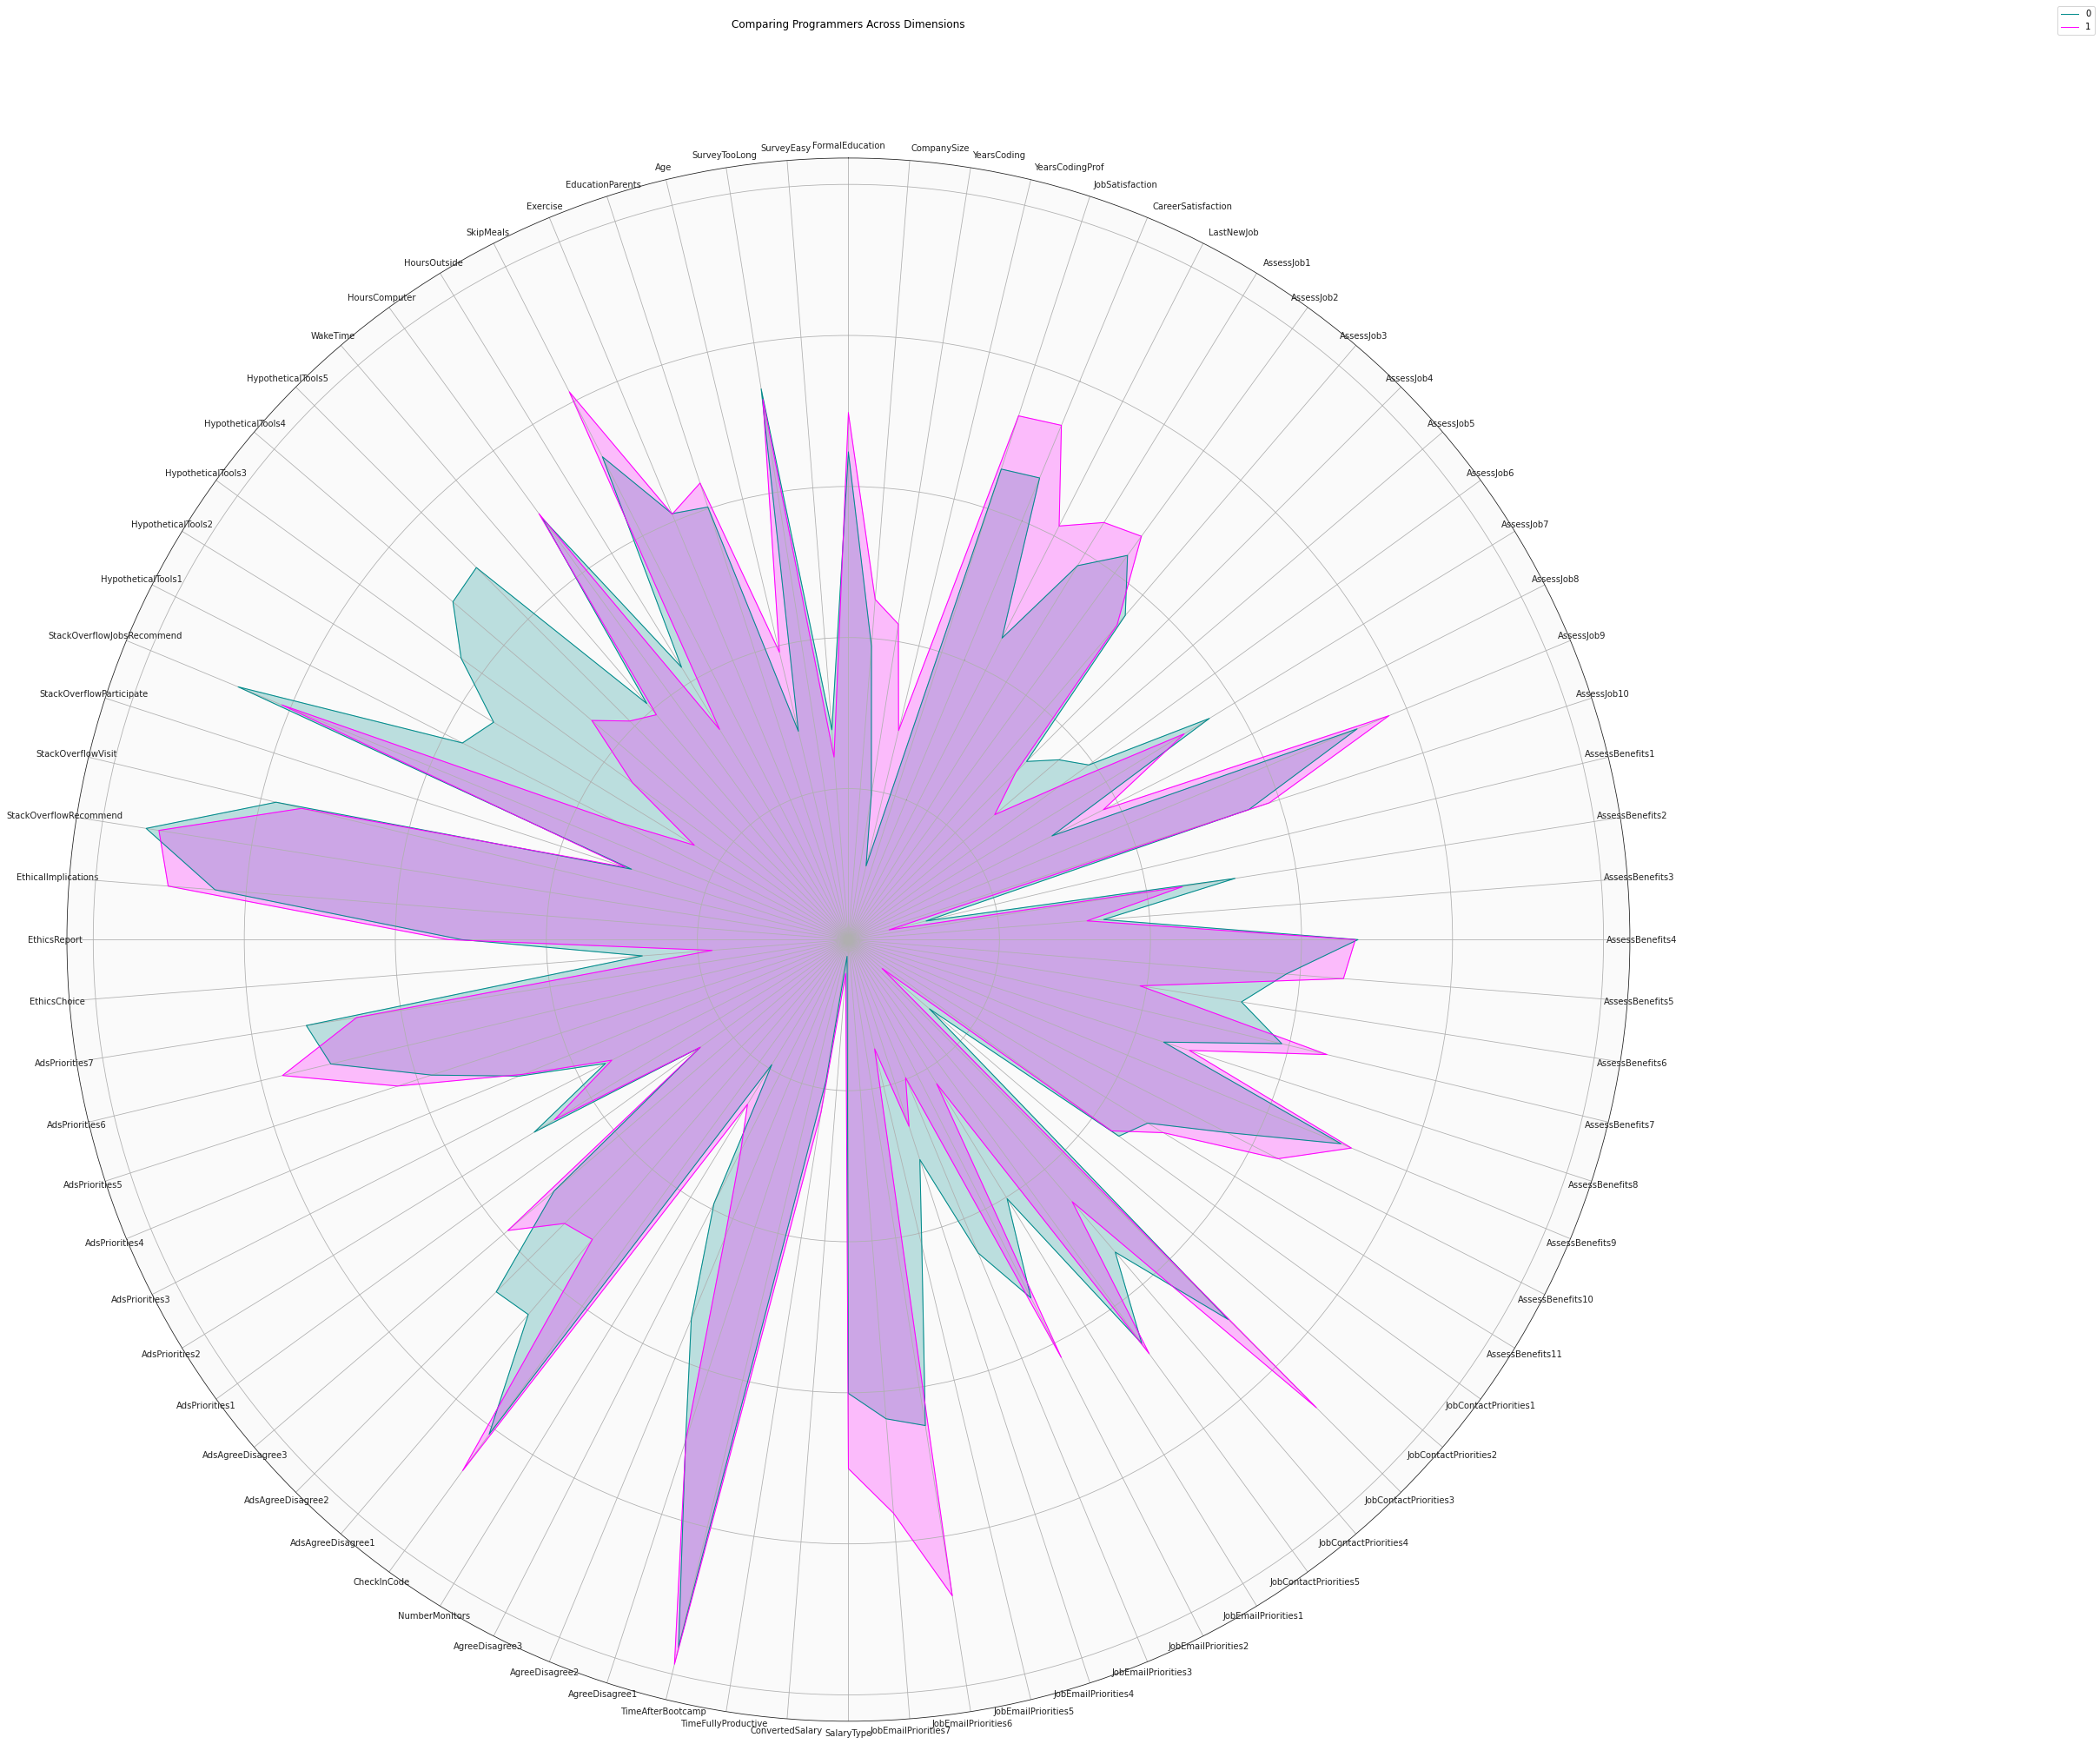

In [19]:
ndf_graph = ndf.drop('labels', inplace=False, axis=1)
labels = ndf_graph.columns.to_list()
points = len(ndf_graph.columns)
angles = np.linspace(0, 2 * np.pi, points, endpoint=False).tolist()
angles += angles[:1]

# creating a helper function to plot a reogrammer solely by the index number
def add_to_star(prog, color, label=None):
    values = ndf_graph.loc[prog].tolist()
    values += values[:1]
    if label != None:
        ax.plot(angles, values, color=color, linewidth=1, label=label)
    else:
        ax.plot(angles, values, color=color, linewidth=1, label=prog)
    ax.fill(angles, values, color=color, alpha=0.25)
    
# create plot object   
fig, ax = plt.subplots(figsize=(33, 33), subplot_kw=dict(polar=True))

colors = ['darkcyan', 'magenta', 'gold', 'blue', 'navy', 'green', 'red']

# plot a new programmer with the add_to_star function
for i in range(0, len(ndf)):
    add_to_star(i, colors[i], i)
# add_to_star(27749, '#1aaf6c', "Random programmer")
# add_to_star(0, '#429bf4', "Random programmer")

# ix axis to star from top
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# ax.set_xticklabels(labels)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

# Change the location of the gridlines or remove them
ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1])
# Change the color of the ticks
ax.tick_params(colors='#222222')

# Make the y-axis labels larger, smaller, or remove by setting fontsize
ax.tick_params(axis='y', labelsize=0)
# Make the x-axis labels larger or smaller.
ax.tick_params(axis='x', labelsize=10)

# Change the color of the circular gridlines.
# ax.grid(color='#AAAAAA')
# Change the color of the outer circle
ax.spines['polar'].set_color('#222222')
# Change the circle background color
ax.set_facecolor('#FAFAFA')

# Add title and legend
ax.set_title('Comparing Programmers Across Dimensions', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.tight_layout()
plt.show()

Zakljcujemo da klaster 0 ima znatno vise vrednosti u sledecim  pitanjima
    HypotheticalTools1	Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. A peer mentoring system
    HypotheticalTools2	Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. A private area for people new to programming
    HypotheticalTools3	Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. A programming-oriented blog platform
    HypotheticalTools4	Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. An employer or job review system
    AdsAgreeDisagree2	To what extent do you agree or disagree with the following statements: I enjoy seeing online updates from companies that I like
    AdsAgreeDisagree3	To what extent do you agree or disagree with the following statements: I fundamentally dislike the concept of advertising
    AssessJob6	Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The office environment or company culture
    JobEmailPriorities2	Imagine that same company decided to contact you through email. Please rank the following items by how important it is to include them in the message (by dragging the choices up and down), where 1 is the most important and 7 is the least important. Details on the specific department I'd be working for or product I'd be working on
    JobEmailPriorities4	Imagine that same company decided to contact you through email. Please rank the following items by how important it is to include them in the message (by dragging the choices up and down), where 1 is the most important and 7 is the least important. Details of which technologies I'd be working with

Dok klaster 1 ima znatno vise vrednosti u sledecim pitanjima
    JobSatisfaction	How satisfied are you with your current job? If you work more than one job, please answer regarding the one you spend the most hours on
    CareerSatisfaction	Overall, how satisfied are you with your career thus far?
    LastNewJob	When was the last time that you took a job with a new employer?
    JobEmailPriorities5	Imagine that same company decided to contact you through email. Please rank the following items by how important it is to include them in the message (by dragging the choices up and down), where 1 is the most important and 7 is the least important. An estimate of the compensation range
    JobEmailPriorities6	Imagine that same company decided to contact you through email. Please rank the following items by how important it is to include them in the message (by dragging the choices up and down), where 1 is the most important and 7 is the least important. Information on the company's hiring process
    JobEmailPriorities7	Imagine that same company decided to contact you through email. Please rank the following items by how important it is to include them in the message (by dragging the choices up and down), where 1 is the most important and 7 is the least important. Details on the company's product development process

In [20]:
x.drop('labels', inplace=True, axis=1)
df_og.drop('labels', inplace=True, axis=1)

Pravimo funkciju po istom principukao za algoritam KMeans samo sto sada koristimo algoritam DBSCAN i povecavamo parametar eps koji nam govori na kojoj udaljenosti ce biti prvi sledeci clan klastera

In [21]:
def bestDBSCANClustering(df, df_og):
    best_sil_sc = 0
    eps = 0.05
    prev_eps = 0
    while eps > prev_eps:
        est = DBSCAN(eps=eps, min_samples=2)
        est.fit(df)
        df_og['labels'] = est.labels_
        if len(df_og['labels'].unique()) > 1:
            sil_sc = met.silhouette_score(df, df_og['labels'])
            if best_sil_sc < sil_sc:
                best_sil_sc = sil_sc
                eps+=0.05
#             print(best_sil_sc)
        else:
            return 0

    est = DBSCAN(eps=eps, min_samples=2)
    est.fit(df)
    df_og['labels'] = est.labels_
    return best_sil_sc

Primenjujemo nasu funkciju i cekamo da dobijemo najbolji siluet skor

In [22]:
b = bestDBSCANClustering(x, df_og)
b

0

In [23]:
df_og['labels'].unique()

array([-1], dtype=int64)

Kako algoritam sve stavlja u jedan klaster i oznacava ga sa -1 to znaci da nije moguce izvrsiti klasterovanje

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64917 entries, 0 to 90209
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FormalEducation             64917 non-null  object 
 1   CompanySize                 64917 non-null  object 
 2   YearsCoding                 64917 non-null  object 
 3   YearsCodingProf             64917 non-null  object 
 4   JobSatisfaction             64917 non-null  object 
 5   CareerSatisfaction          64917 non-null  object 
 6   LastNewJob                  64917 non-null  object 
 7   AssessJob1                  64917 non-null  float64
 8   AssessJob2                  64917 non-null  float64
 9   AssessJob3                  64917 non-null  float64
 10  AssessJob4                  64917 non-null  float64
 11  AssessJob5                  64917 non-null  float64
 12  AssessJob6                  64917 non-null  float64
 13  AssessJob7                  649

Postavljamo seed funkciju kako bi nam pri slucajnom uzorkovanju koje ovde vrsimo nad razlicitim skupovima bili vraceni identicni indeksi uzoraka

In [25]:
random.seed(123)
df = df.sample(frac=0.1)
df_og = df_og.sample(frac=0.1)
# if(df_og.index.all() == df.index.all()):
#     print(1)
scaler = MinMaxScaler().fit(df)
x = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
x.head()

,FormalEducation,CompanySize,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,LastNewJob,AssessJob1,AssessJob2,AssessJob3,...,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,Exercise,EducationParents,Age,SurveyTooLong,SurveyEasy
81114,0.750,0.285714,0.0,0.0,0.833333,0.833333,0.25,0.666667,1.000000,0.111111,...,1.00,0.3,0.75,0.75,1.000000,1.000000,0.250,0.166667,0.5,0.00
69336,0.750,0.000000,0.2,0.1,0.666667,0.833333,0.50,0.888889,0.888889,0.777778,...,0.00,0.4,1.00,0.75,1.000000,1.000000,0.750,0.333333,1.0,0.25
49554,0.750,0.428571,0.1,0.0,0.500000,0.500000,0.25,0.222222,0.555556,0.777778,...,0.75,0.5,0.50,0.50,0.666667,0.333333,0.875,0.166667,1.0,0.25
2835,0.875,1.000000,1.0,0.8,0.666667,0.666667,1.00,0.888889,1.000000,0.222222,...,0.50,0.4,0.75,0.25,1.000000,0.000000,0.750,0.666667,0.5,0.25
43493,0.750,0.142857,0.2,0.2,0.833333,0.833333,0.75,0.666667,1.000000,0.888889,...,1.00,0.4,0.75,0.50,1.000000,0.666667,0.250,0.333333,1.0,0.50


Pravimo funkciju po istom principu kao za prethodna dva algoritma i povecavamo broj klastera i koristimo razlicite kriterijume za distancu

In [26]:
def bestHierarchicalClustering(df, df_og):
    scores = {}
    for link in ['complete', 'average', 'single']: 
        best_sil_sc = 0
        i = 2
        prev_i = 1
        while i > prev_i:
            est = AgglomerativeClustering(n_clusters=i, linkage=link)
            est.fit(df)
            df_og['labels'] = est.labels_
            sil_sc = met.silhouette_score(df, df_og['labels'])
            prev_i = i
            if best_sil_sc < sil_sc:
                best_sil_sc = sil_sc
                i+=1
                scores.update({link+'_num_clust' : prev_i})
#             print("%s %d \n" %(link, best_sil_sc))
        
        est = AgglomerativeClustering(n_clusters=i-1, linkage=link)
        est.fit(df)
        df_og['labels'] = est.labels_
        scores.update({link : best_sil_sc})
        
    
        
    return scores

Primenjujemo nasu funkciju

In [27]:
b = bestHierarchicalClustering(x, df_og)
b

{'complete_num_clust': 3,
 'complete': 0.018054983865395863,
 'average_num_clust': 2,
 'average': 0.205072961886883,
 'single_num_clust': 2,
 'single': 0.25940099930880756}

Na osnovu siluet skora zakljucujemo da su nam vrednosti za dva klastera i kod average i kod single veze najbolji

In [28]:
df_og['labels'].unique()

array([0, 1], dtype=int64)

In [29]:
x_og = x.copy()
x = x.sample(frac=0.1)
# x.info()

Crtamo grafik za hijerahijsko klasterovanje singl veze i liniju povlacimo tamo gde je distanca izmedju klastera najveca

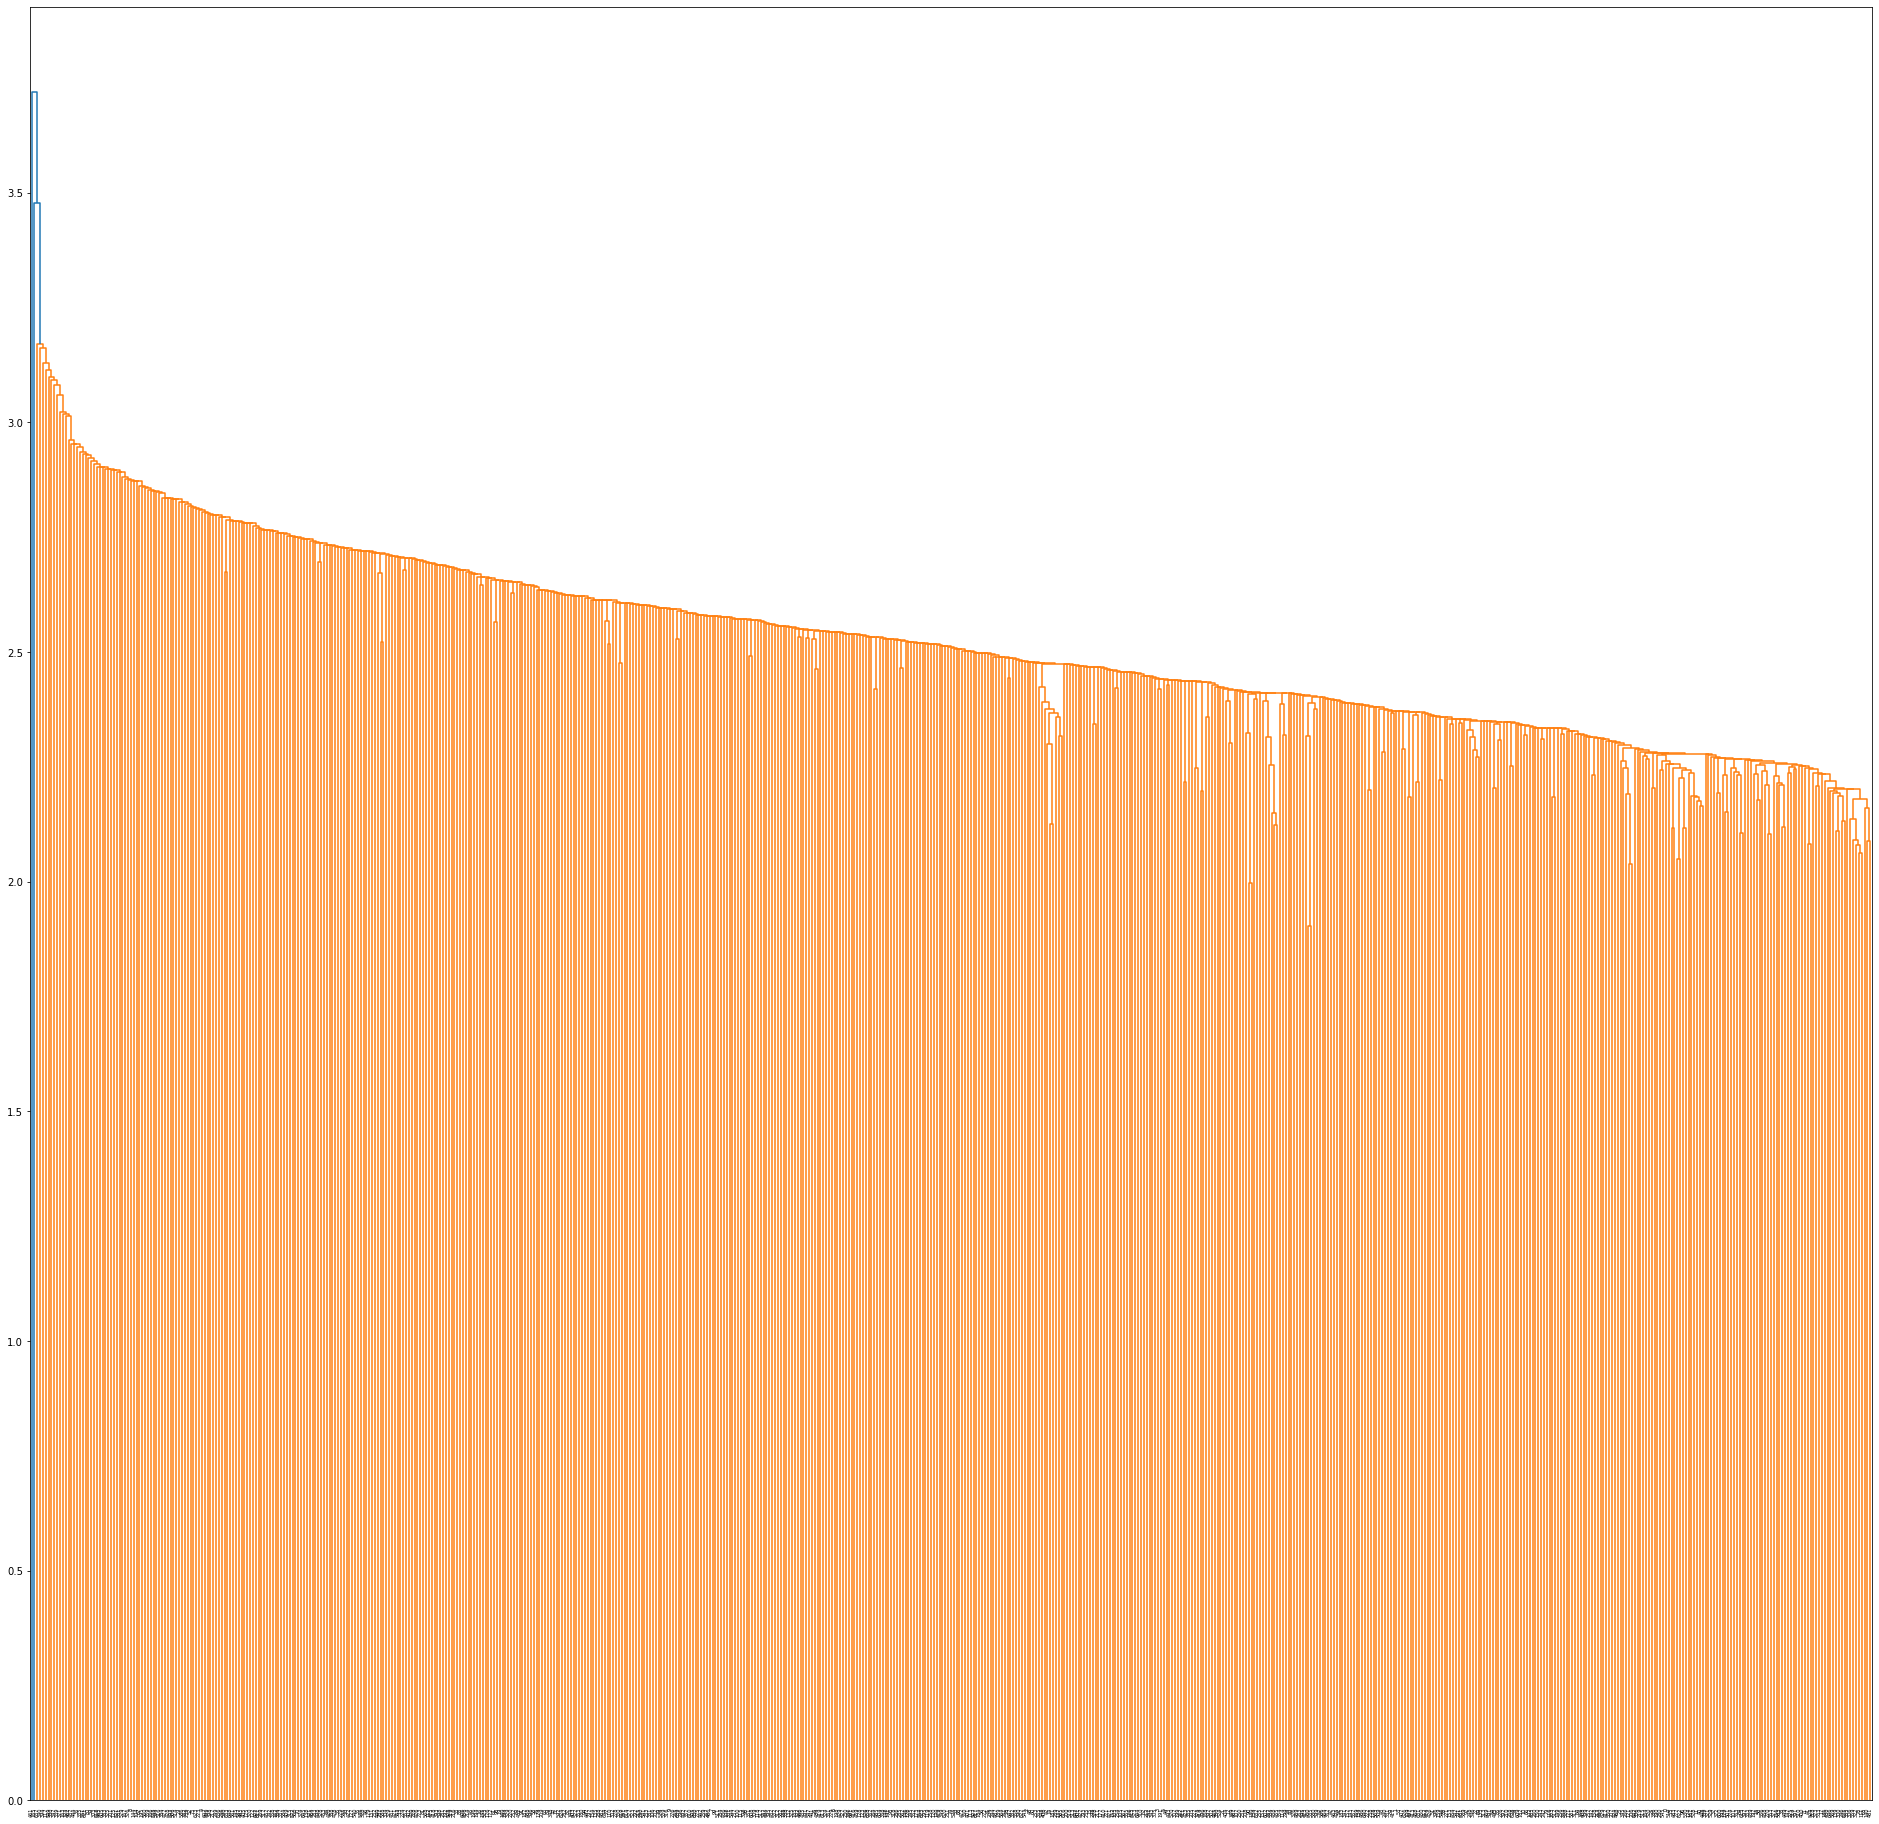

In [30]:
fig = plt.figure(figsize=(33,33))
dendrogram(linkage(x, 'single'), color_threshold=3.2)
#             orientation='top',
# #             distance_sort='descending',
#             show_leaf_counts=True)

plt.show()

Zakljcujemo da jedan klaster (plavi) ima samo dva elementa, a svi ostali elementi pripadaju drugom klasteru

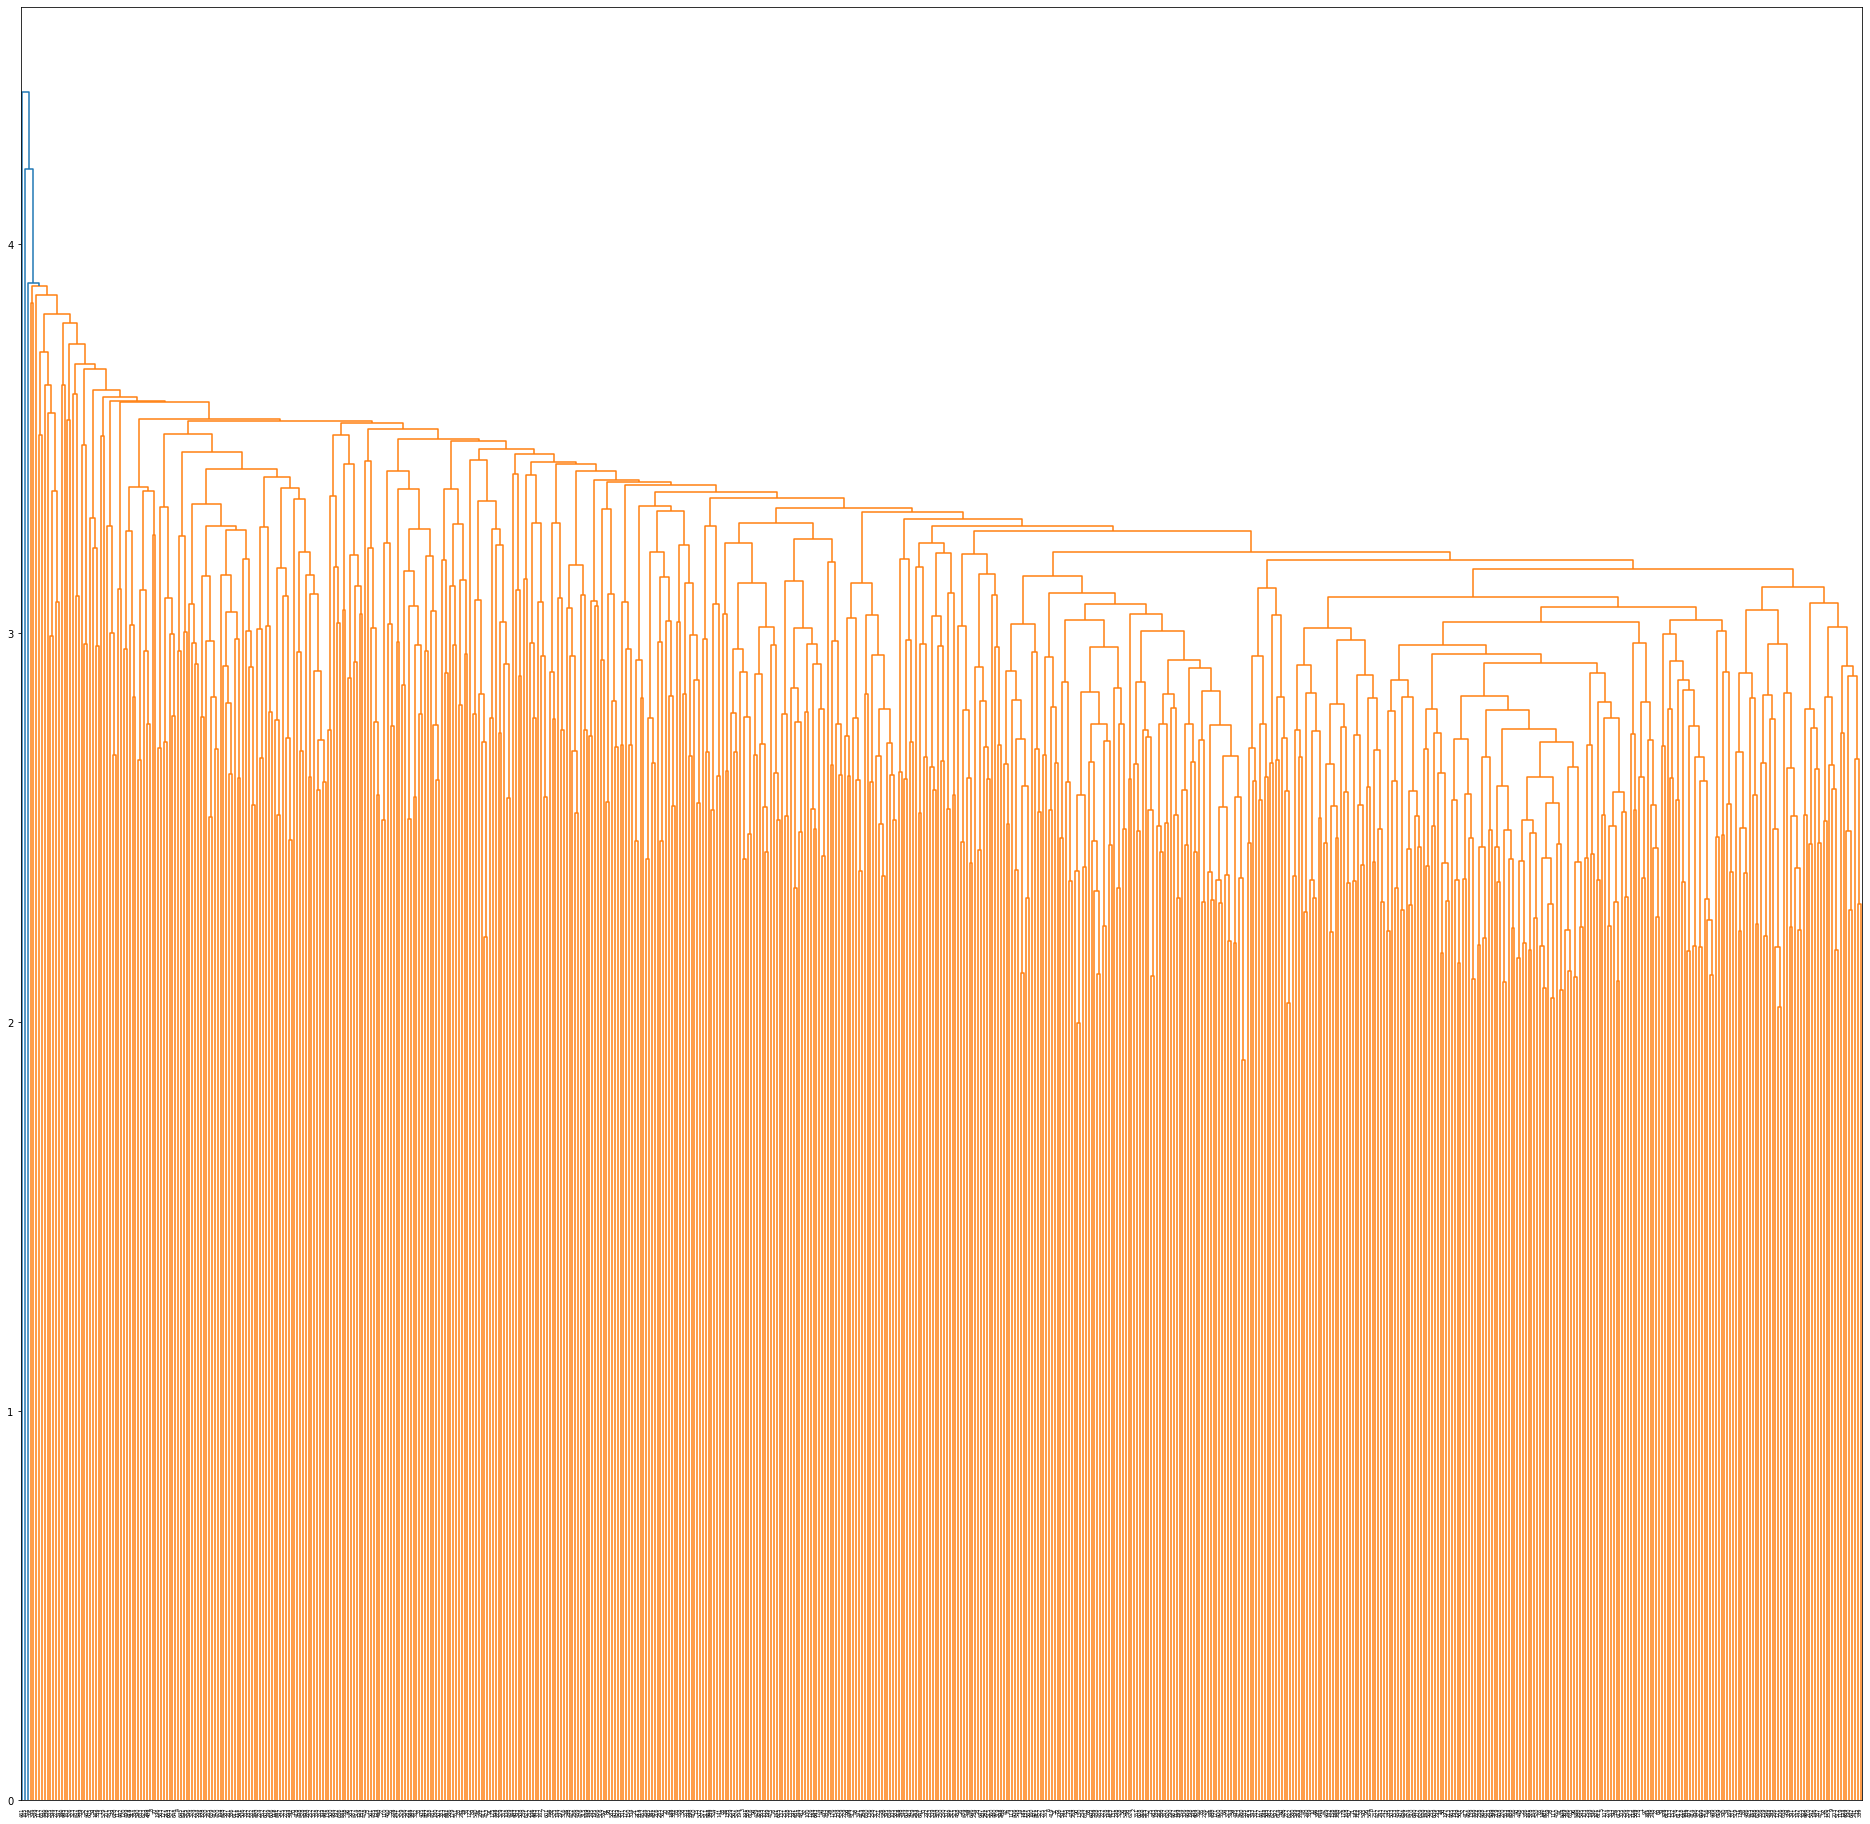

In [31]:
fig = plt.figure(figsize=(33,33))
dendrogram(linkage(x, 'average'), color_threshold=3.9)
#             orientation='top',
# #             distance_sort='descending',
#             show_leaf_counts=True)

plt.show()

Identican je zakljucak kao i kod prethodne veze

Zakljucak koji mozemo izvesti je da su podaci dovoljno nezavisni i razliciti da ih je nemoguce sa vecom sigurnoscu grupisati u klastere na osnovu slicnih osobina, a da sami klasteri pri tome u vecoj meri budu medjusobno razliciti